In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<img src = '5_1_1_1.png'/>

<img src ='5_1_1_2.png'/>

In [3]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [9]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [5]:
means = []
days = []
daily = []

sum_mean = 0
sum_days = 0
sum_milk = 0

for i in range(0, len(milk)):
    day = (milk.iloc[:, 0].index[i]).days_in_month
    days.append(day)
    mean = milk['milk'][i] / days[i]
    sum_mean  += mean
    sum_days += day
    sum_milk += milk['milk'][i]
    means.append(mean)
    daily.append([milk.index[i], mean])
print(round(sum_milk/sum_days, 4))
print(round(sum_mean, 2))
print(min(means), max(means))
print(len(means))

24.8293
4171.52
18.433333333333334 31.566666666666666
168


In [8]:
daily

[[Timestamp('1962-01-01 00:00:00'), 24.193548387096776],
 [Timestamp('1962-02-01 00:00:00'), 20.035714285714285],
 [Timestamp('1962-03-01 00:00:00'), 20.64516129032258],
 [Timestamp('1962-04-01 00:00:00'), 21.866666666666667],
 [Timestamp('1962-05-01 00:00:00'), 23.451612903225808],
 [Timestamp('1962-06-01 00:00:00'), 23.233333333333334],
 [Timestamp('1962-07-01 00:00:00'), 20.64516129032258],
 [Timestamp('1962-08-01 00:00:00'), 19.322580645161292],
 [Timestamp('1962-09-01 00:00:00'), 18.933333333333334],
 [Timestamp('1962-10-01 00:00:00'), 18.612903225806452],
 [Timestamp('1962-11-01 00:00:00'), 18.433333333333334],
 [Timestamp('1962-12-01 00:00:00'), 18.774193548387096],
 [Timestamp('1963-01-01 00:00:00'), 19.35483870967742],
 [Timestamp('1963-02-01 00:00:00'), 20.214285714285715],
 [Timestamp('1963-03-01 00:00:00'), 21.06451612903226],
 [Timestamp('1963-04-01 00:00:00'), 22.433333333333334],
 [Timestamp('1963-05-01 00:00:00'), 23.93548387096774],
 [Timestamp('1963-06-01 00:00:00'), 

In [33]:
milk_daily = pd.DataFrame.from_records(daily, index = [0])

In [59]:
mlk = milk_daily.drop([0], axis = 1)

In [24]:
mlk.head()

,1
0,
1962-01-01,24.193548
1962-02-01,20.035714
1962-03-01,20.645161
1962-04-01,21.866667
1962-05-01,23.451613


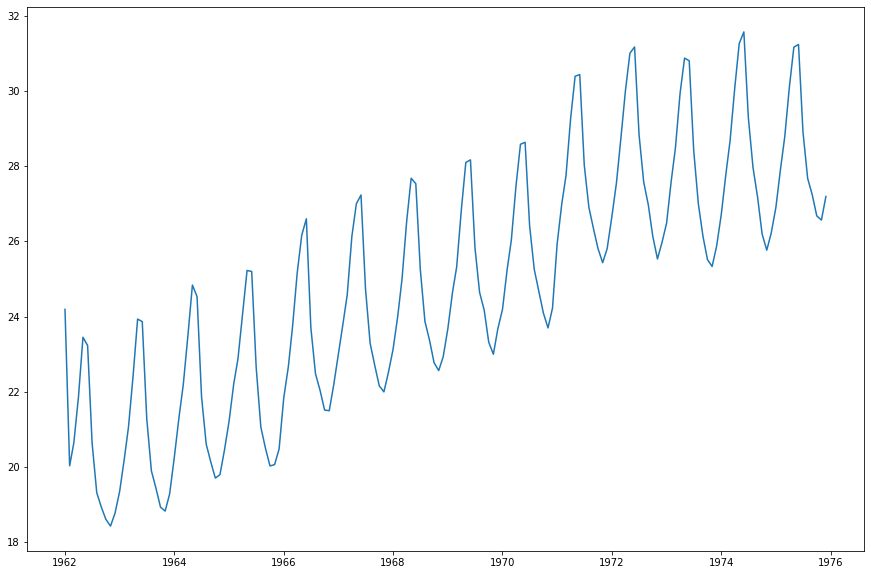

In [60]:
# 6
plot(mlk)

<img src ='5_1_1_3.png'/>

In [30]:
import statsmodels.api as sm

Критерий Дики-Фуллера: p=0.038492


<Figure size 1080x720 with 0 Axes>

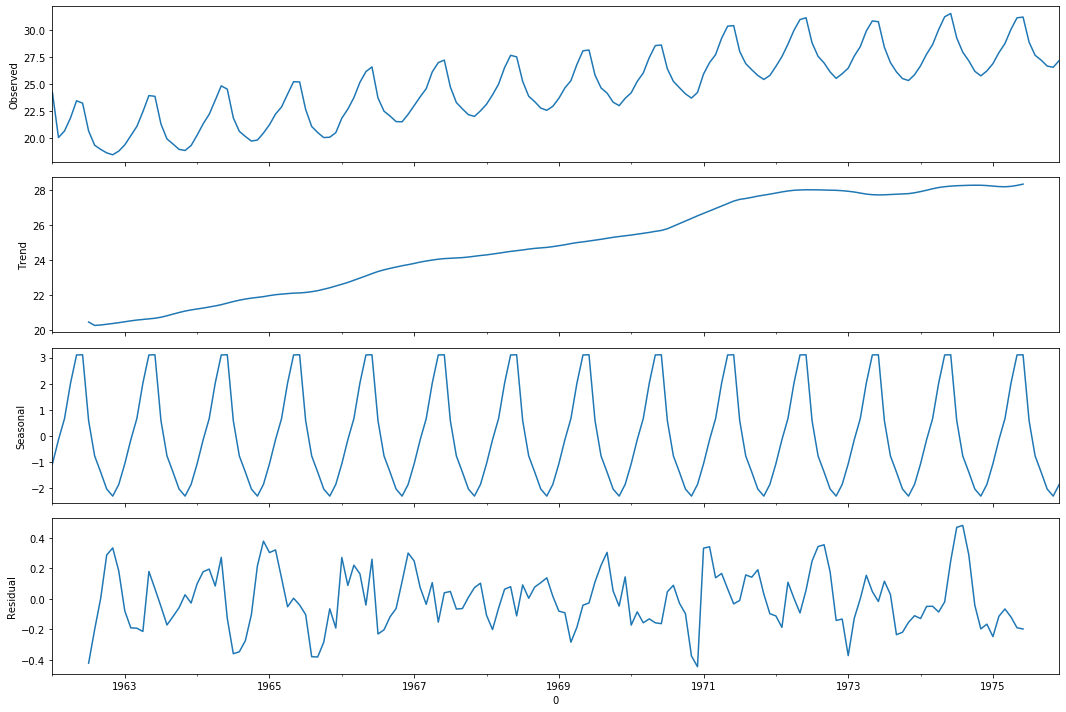

In [41]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(mlk[1]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(mlk[1])[1])

Критерий Дики-Фуллера: p=0.013670


<Figure size 1080x720 with 0 Axes>

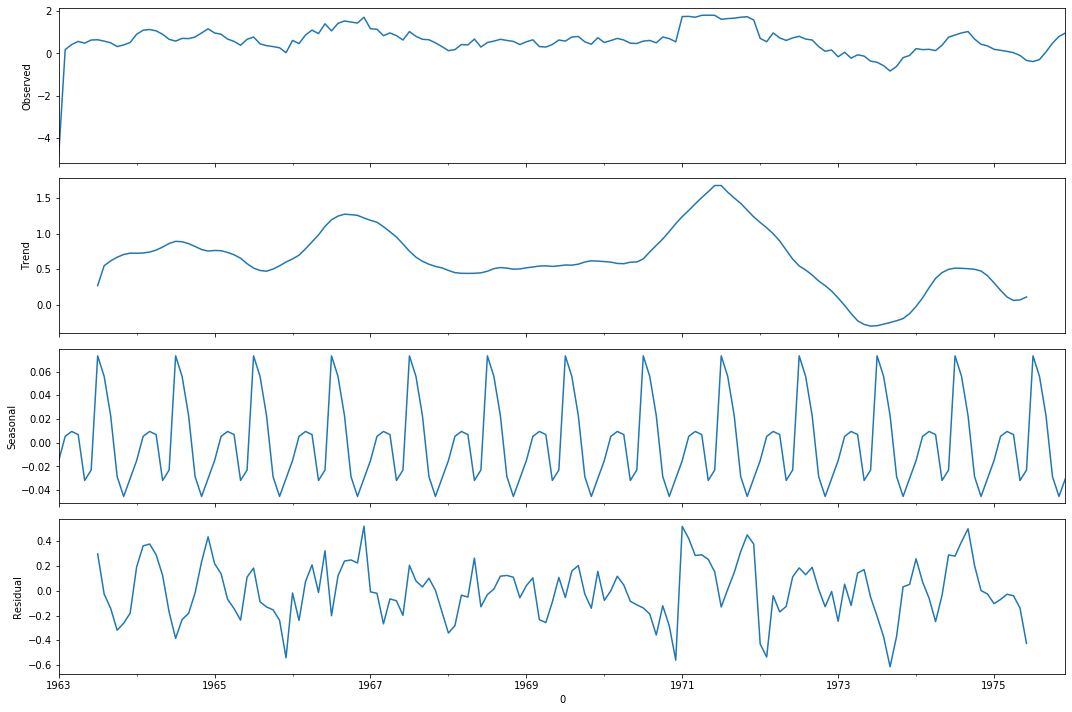

In [49]:
mlk['season_daily_diff'] = mlk[1] - mlk[1].shift(12)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(mlk.season_daily_diff[12:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(mlk.season_daily_diff[12:])[1])

#mlk.season_diff = mlk[1] - mlk[1].shift(12)

#plt.figure(figsize(15,10))
#sm.tsa.seasonal_decompose(mlk.season_diff[12:]).plot()
#plt.show()

# print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(mlk.season_diff[12:])[1])

Критерий Дики-Фуллера: p=0.005034


<Figure size 1080x720 with 0 Axes>

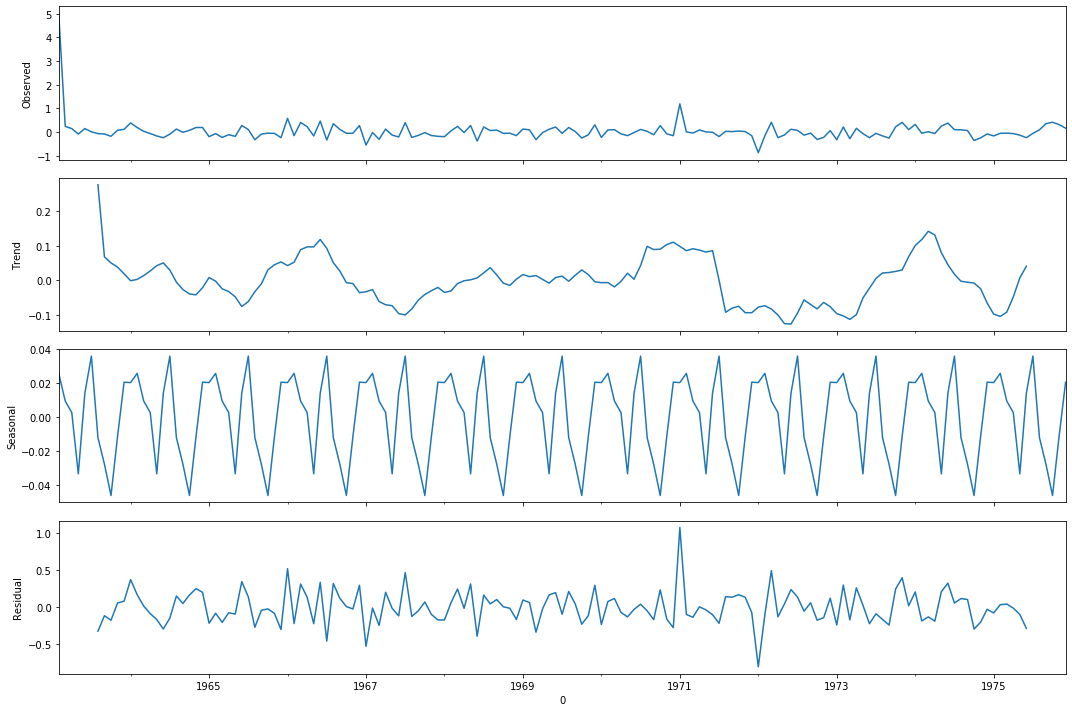

In [50]:
mlk['daily_diff'] = mlk.season_daily_diff - mlk.season_daily_diff.shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(mlk.daily_diff[13:]).plot()   
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(mlk.daily_diff[13:])[1])

<img src ='5_1_1_4.png'/>

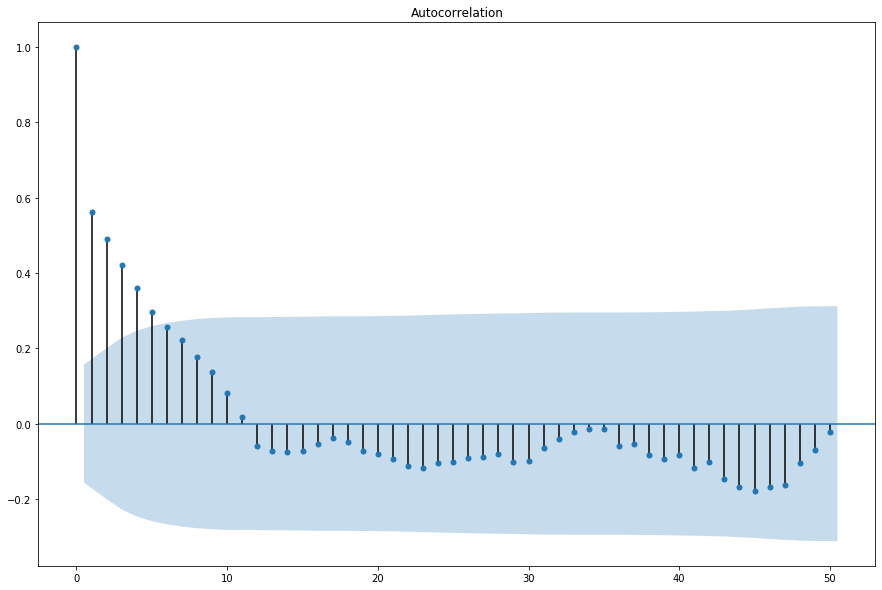

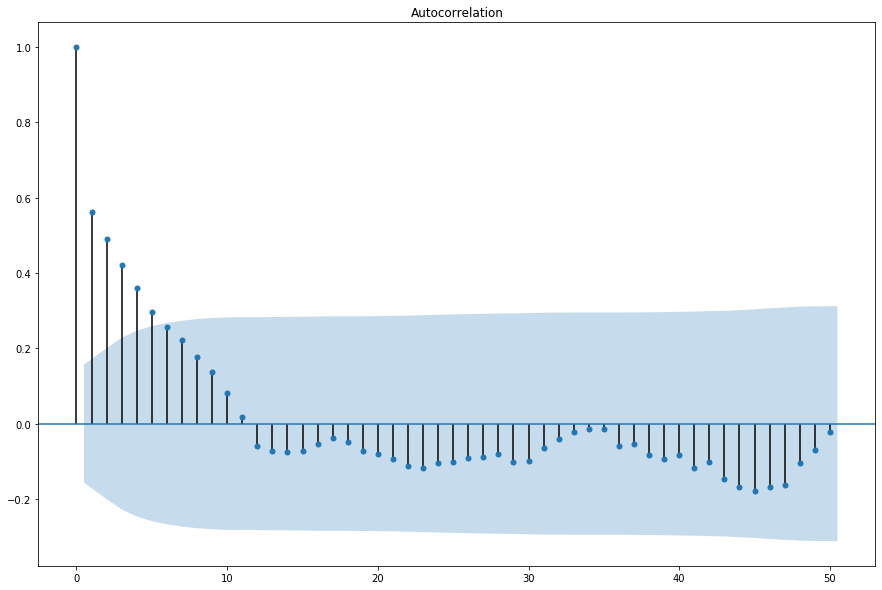

In [56]:
sm.graphics.tsa.plot_acf(mlk.season_daily_diff[12:].values.squeeze(), lags=50)

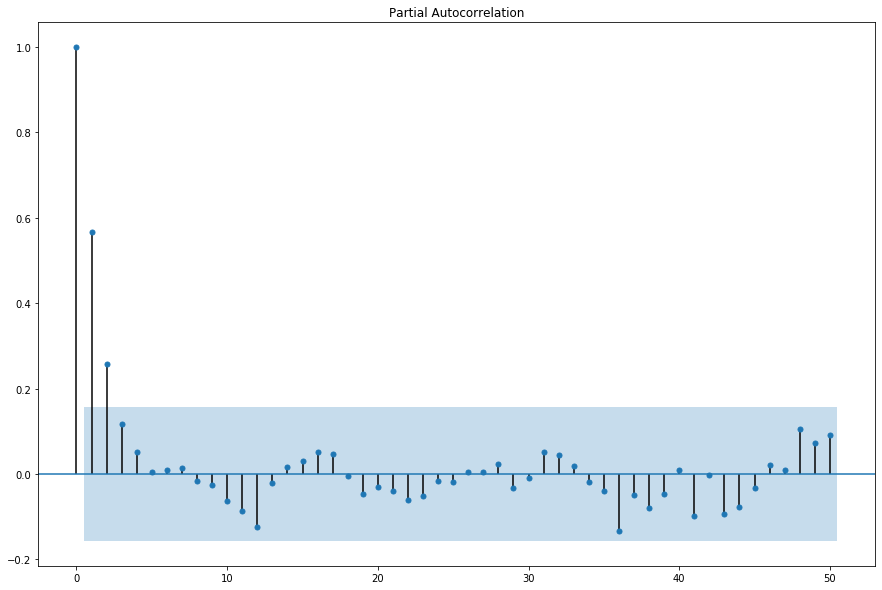

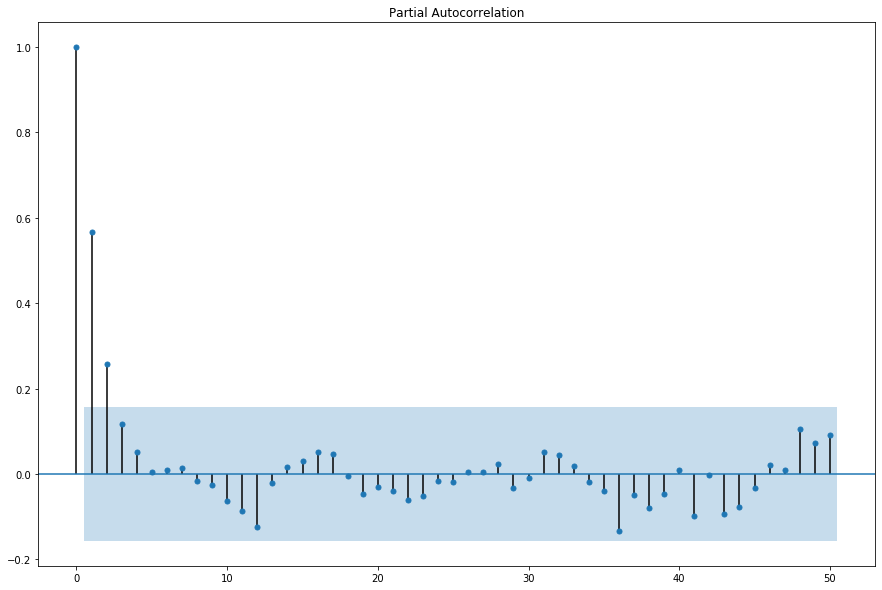

In [57]:
sm.graphics.tsa.plot_pacf(mlk.season_daily_diff[12:].values.squeeze(), lags=50)

In [39]:
print ("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(mlk.season_diff[12:])[1])

Критерий Дики-Фуллера: p=0.013670


<Figure size 1080x720 with 0 Axes>

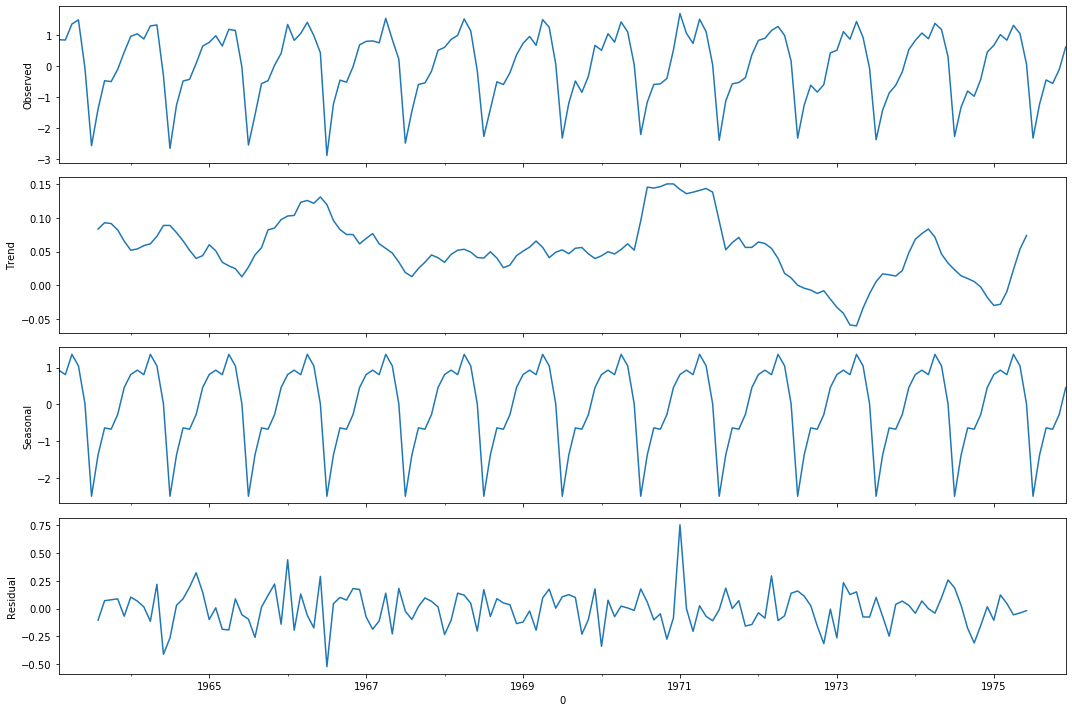

In [40]:
mlk.season_diff = mlk[1] - mlk[1].shift(1)

plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(mlk.season_diff[13:]).plot()
plt.show()

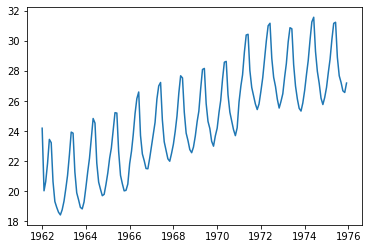

In [29]:
plot(mlk)